# Fase 1: Importación del dataset.

Importar los dataset desde mi drive prviamente subidos

In [ ]:
from google.colab import files
!pip install -q kaggle
uploaded = files.upload()
!kaggle datasets download -d shree1992/housedata
!unzip housedata.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 96.1MB/s]
Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


#Tratamiento de los Dataset




In [73]:
import pandas as pd
dfDataHousecsv = pd.read_csv('data.csv')
dfDataHouseOutputcsv = pd.read_csv('output.csv')
dfDataHouse_json = pd.read_json('data.dat')
dfDataHouse_json = pd.json_normalize(dfDataHouse_json['houses']).drop_duplicates()

Vamos a analizar los tres dataset importados

In [74]:
dfDataHousecsv.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA


In [75]:
dfDataHouseOutputcsv.head(1)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA


In [76]:
dfDataHouse_json.head(1)

,yr_renovated,price,waterfront,floors,rooms,address,date,yr_built,condition,view,area.sqft_basement,area.sqft_above,area.sqft_living/sqft_lot
0,NaN,313000.0,0,1.5,Number of bathrooms: 1.5; Number of bedrooms: 3,"18810 Densmore Ave N, Shoreline, WA 98133, USA",20140502T000000,1955,3,0,0,1340,sqft_living/sqft_lot=1340\ 7912


Tras visualizar las primeras lienas de cada daframe podemos constatar que el **dfDataHouse_json** parece un conjunto de datos menos limpio, mientras que los otros dos DataFrames conservan un formato más limpio y estructurado



*   Los Dataframe dfDataHousecsv y dfDataHouseOutputcsv tienen las mismas columnas (date, price, bedrooms, etc.).
dfDataHouse_json incluye columnas adicionales (como rooms y area.sqft_living/sqft_lot) y tambirn combina información derivada( como address, las areas entre otras columnas).
*   dfDataHouse_json muestra valores nulos en algunas columnas, como yr_renovated


Por lo tanto, vams a tratar las columnas y filas del dfDataHouse_json para transformar su estructura y hacerla coincidir con la de los otros DataFrames (dfDataHousecsv y dfDataHouseOutputcsv), ya que contienen la misma información.



-------------------------------------------------------------------------------------------------






Renombra las columnas 'area.sqft_basement' y 'area.sqft_above' para que coincidan con los nombres estándar de los otros DataFrames.

In [77]:
# Renombra las columnas 'area.sqft_basement' y 'area.sqft_above' para que coincidan con los nombres estándar de los otros DataFrames.
df = dfDataHouse_json.rename(columns={'area.sqft_basement': 'sqft_basement', 'area.sqft_above': 'sqft_above'})


Dividir la columnas area.sqft_living/sqft_lot en (sqft_living y sqft_lot) y convertir a tipo entero


In [78]:

# Extrae valores numéricos en el formato 'número / número' de la columna 'area.sqft_living/sqft_lot' y actualiza la columna con estos valores.
df['area.sqft_living/sqft_lot'] = df['area.sqft_living/sqft_lot'].str.extract(r'(\d+\\ \d+)')

# Extrae el primer valor (sqft_living) de la columna 'area.sqft_living/sqft_lot', lo convierte a entero y lo almacena en una nueva columna 'sqft_living'.
df['sqft_living'] = df['area.sqft_living/sqft_lot'].apply(lambda x: x.split('\ ')[0]).astype('int64')

# Extrae el segundo valor (sqft_lot) de la columna 'area.sqft_living/sqft_lot', lo convierte a entero y lo almacena en una nueva columna 'sqft_lot'.
df['sqft_lot'] = df['area.sqft_living/sqft_lot'].apply(lambda x: x.split('\ ')[1]).astype('int64')

Dividir la columna address en (city,statezip,country,street)


In [79]:

# Extrae el nombre de la ciudad desde la columna 'address' dividiendo el texto por comas y tomando el segundo elemento.
df['city'] = df['address'].apply(lambda x: x.split(',')[1])

# Extrae el estado y el código postal desde la columna 'address', dividiéndolo por comas y tomando el tercer elemento.
df['statezip'] = df['address'].apply(lambda x: x.split(',')[2])

# Extrae el país desde la columna 'address', dividiéndolo por comas y tomando el cuarto elemento.
df['country'] = df['address'].apply(lambda x: x.split(',')[3])

# Extrae la calle desde la columna 'address', dividiéndolo por comas y tomando el primer elemento.
df['street'] = df['address'].apply(lambda x: x.split(',')[0])

Dividir la columna rooms en (bedrooms y bathrooms) y convertir a tipo float

In [80]:
# Modifica la columna 'rooms' para extraer y combinar los valores correspondientes al número de habitaciones y baños.
# Divide el texto en palabras usando espacios como separadores y concatena el tercer y séptimo elemento (índices 3 y 7).
df['rooms'] = df['rooms'].apply(lambda x: f"{x.split(' ')[3]}{x.split(' ')[7]}")


# Extrae el número de dormitorios desde la columna 'rooms', dividiéndolo por punto y coma y tomando el segundo elemento, luego lo convierte a tipo float.
df['bedrooms'] = df['rooms'].apply(lambda x: x.split(';')[1]).astype('float64')

# Extrae el número de baños desde la columna 'rooms', dividiéndolo por punto y coma y tomando el primer elemento, luego lo convierte a tipo float.
df['bathrooms'] = df['rooms'].apply(lambda x: x.split(';')[0]).astype('float64')

Rellenar los valores perdidos en la columna (yr_renovated) con 0 y convertir a tipo entero

In [81]:

# Rellena valores nulos en la columna 'yr_renovated' con 0 y lo convierte a tipo entero.
df['yr_renovated'] = df['yr_renovated'].fillna(0).astype('int64')

Reestructura el formato de la columna 'date'

In [82]:

# Reestructura el formato de la columna 'date' para seguir el formato 'AAAA-MM-DD HH:MM:SS'.
df['date'] = df['date'].apply(lambda x: f"{x[0:4]}-{x[4:6]}-{x[6:8]} {x[9:11]}:{x[11:13]}:{x[13:15]}")

reorganizar en el DataFrame

In [83]:

# Selecciona y reorganiza las columnas en el DataFrame para que coincidan con la estructura de los otros DataFrames.
dfDataHouse_json = df[['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country']]

Tras corregir las columnas y filas, hemos conseguido que el dfDataHouse_json esté correctamente alineado con los demás DataFrames. Ahora, las columnas y filas presentan la misma estructura y formato, garantizando la uniformidad de los datos.

In [84]:
dfDataHousecsv.head(1)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA


In [85]:
dfDataHouse_json.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,0,18810 Densmore Ave N,Shoreline,WA 98133,USA


In [86]:
dfDataHousecsv.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA


Haciendo uso de la funcion df.info() indica que los tres DataFrames tienen una estructura idéntica. cuentan con 18 columnas, sin valores nulos, y presentan el mismo tipo de datos para cada columna.

In [87]:
dfDataHouse_json.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4600 entries, 0 to 4600
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float64(4)

In [88]:
dfDataHousecsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [89]:
dfDataHouseOutputcsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

# Fase 2: Análisis exploratorio de los datos.

##ANALISÍS EXPLORACIÓN (ANALÍTICA)

Para ello vamos a trabjar con uno de nuestro Datframe(dfDataHousecsv) llamandolo **df** y por ultimo renombramos las columnas traducidos de Ingles a Español

In [90]:
df = dfDataHousecsv.rename(columns={
    'date': 'fecha',
    'price': 'precio',
    'bedrooms': 'habitaciones',
    'bathrooms': 'baños',
    'sqft_living': 'mts_cuadrados_vivienda',
    'sqft_lot': 'mts_cuadrados_terreno',
    'floors': 'pisos',
    'waterfront': 'frente_al_agua',
    'view': 'vista',
    'condition': 'condicion',
    'sqft_above': 'mts_cuadrados_arriba',
    'sqft_basement': 'mts_cuadrados_sotano',
    'yr_built': 'anio_construccion',
    'yr_renovated': 'anio_renovacion',
    'street': 'calle',
    'city': 'ciudad',
    'statezip': 'estado_codigo_postal',
    'country': 'pais'
})


Listamos las primeras lineas de nuestro dataset

In [91]:
df.head(5)

,fecha,precio,habitaciones,baños,mts_cuadrados_vivienda,mts_cuadrados_terreno,pisos,frente_al_agua,vista,condicion,mts_cuadrados_arriba,mts_cuadrados_sotano,anio_construccion,anio_renovacion,calle,ciudad,estado_codigo_postal,pais
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Listar columnas

In [92]:
df.columns

Index(['fecha', 'precio', 'habitaciones', 'baños', 'mts_cuadrados_vivienda',
       'mts_cuadrados_terreno', 'pisos', 'frente_al_agua', 'vista',
       'condicion', 'mts_cuadrados_arriba', 'mts_cuadrados_sotano',
       'anio_construccion', 'anio_renovacion', 'calle', 'ciudad',
       'estado_codigo_postal', 'pais'],
      dtype='object')

Mostar numeros de filas y columnas

In [93]:
df.shape

(4600, 18)

Analisemos los variables estadisticos (ccolumnas numericas) de nuestro dataset.

In [94]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
precio,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
habitaciones,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
baños,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
mts_cuadrados_vivienda,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
mts_cuadrados_terreno,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
pisos,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
frente_al_agua,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
vista,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condicion,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
mts_cuadrados_arriba,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


Destectar y contar los valores nulos en las columnas del DataFrame


In [95]:
df.isnull().sum()

,0
fecha,0
precio,0
habitaciones,0
baños,0
mts_cuadrados_vivienda,0
mts_cuadrados_terreno,0
pisos,0
frente_al_agua,0
vista,0
condicion,0


Visualizar tipo variables

In [96]:
df.dtypes

,0
fecha,object
precio,float64
habitaciones,float64
baños,float64
mts_cuadrados_vivienda,int64
mts_cuadrados_terreno,int64
pisos,float64
frente_al_agua,int64
vista,int64
condicion,int64


##  ANALISÍS EXPLORACIÓN (VISUAL)

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

### visualizacion histogramas

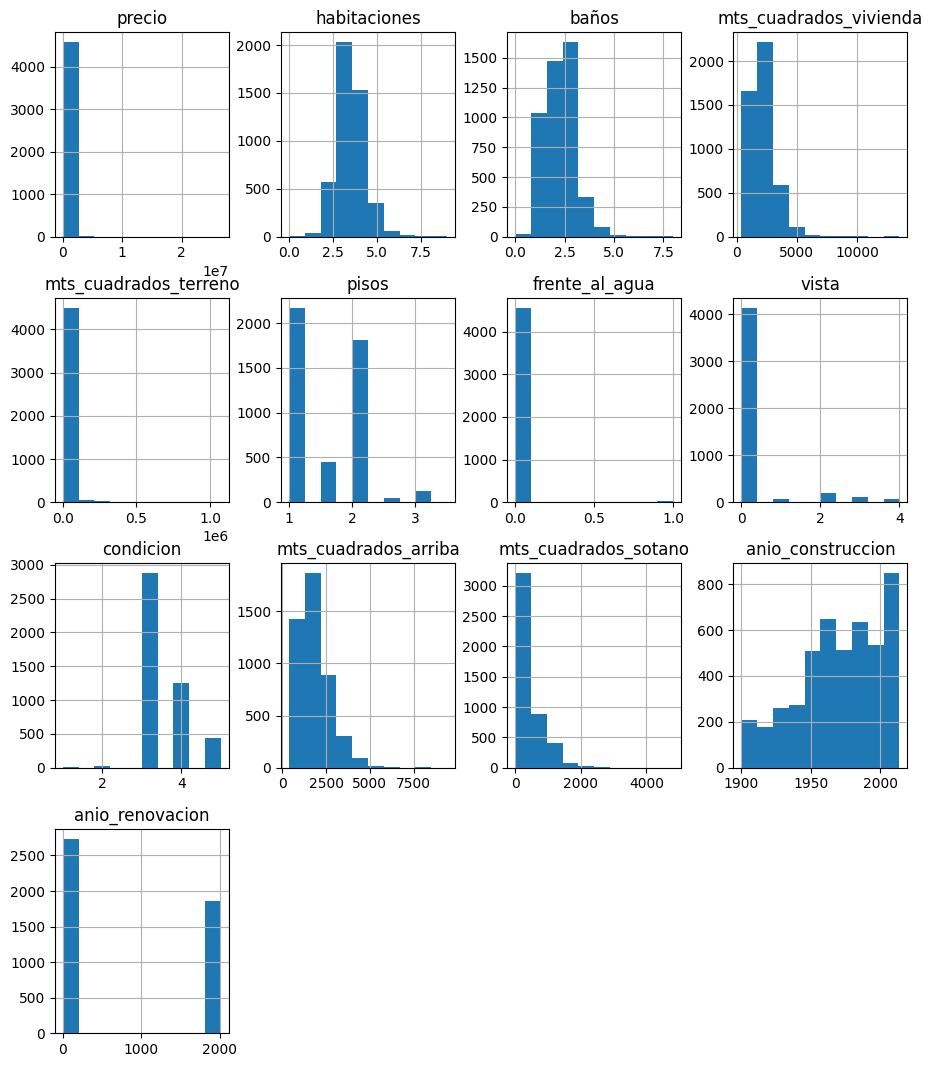

In [98]:
# visualizacion histogramas
df.hist(figsize=(11,13))
plt.show()

### Histograma

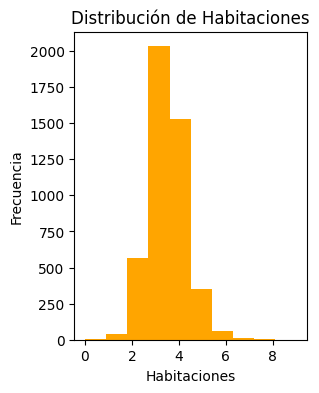

In [99]:
# Histograma (Distribución de edades)
plt.figure(figsize=(3,4))
plt.hist(df['habitaciones'], bins=10, color='orange')
plt.title('Distribución de Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Frecuencia')
plt.show()

Conclusión:
* En general, los datos parecen tener una distribución concentrada en el rango de propiedades de tamaño promedio(de 2 a 5 )
* La mayoría de las propiedades tienen entre 2 y 4 habitaciones, siendo 3



habitaciones la cantidad más frecuente (moda)

### Diagrama de barras

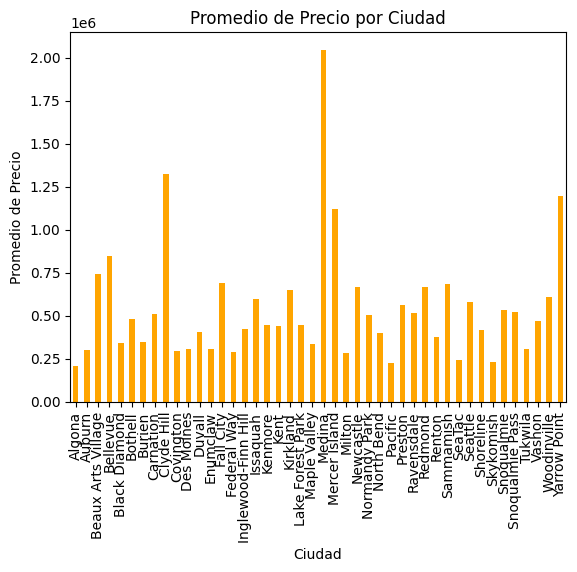

In [100]:
# Diagrama de barras (Promedio de pais por precio)
# plt.figure(figsize=(8, 10))
region_charges = df.groupby('ciudad')['precio'].mean()
region_charges.plot(kind='bar', color='orange')
plt.title('Promedio de Precio por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Promedio de Precio')
plt.show()

Se observa que algunas ciudades tienen precios medios notablemente más altos que otras, lo cual destaca las diferencias en el costo de la vivienda y el mercado inmobiliario segun las distintas áreas.

### Diagrama de scatte

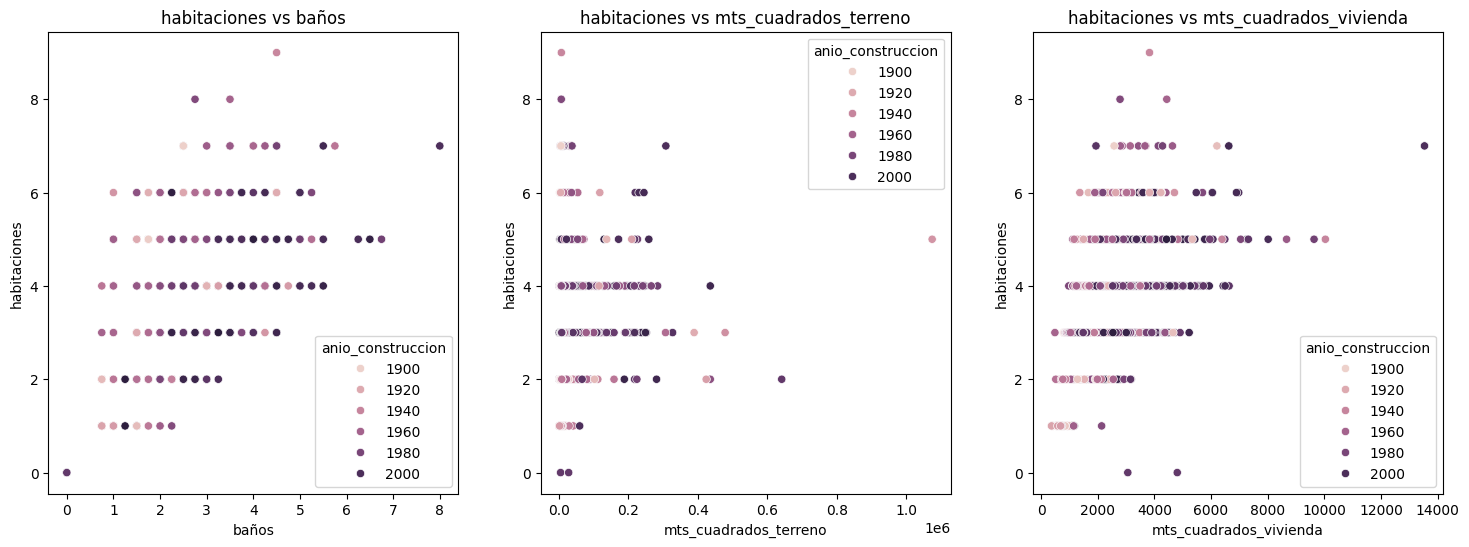

In [101]:
# Crear una figura con 1 fila y 3 columnas de subgráficos
f, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatterplot: Habitaciones vs Baños
sns.scatterplot(data=df, x='baños', y='habitaciones', hue='anio_construccion', ax=axes[0])
axes[0].set_title('habitaciones vs baños')

# Scatterplot: Habitaciones vs mts_cuadrados_terreno
sns.scatterplot(data=df, x='mts_cuadrados_terreno', y='habitaciones', hue='anio_construccion', ax=axes[1])
axes[1].set_title('habitaciones vs mts_cuadrados_terreno')

# Scatterplot: Habitaciones vs Metros cuadrados de vivienda
sns.scatterplot(data=df, x='mts_cuadrados_vivienda', y='habitaciones', hue='anio_construccion', ax=axes[2])
axes[2].set_title('habitaciones vs mts_cuadrados_vivienda')

# Guardar la figura
plt.savefig('scatterplot.png')

# Mostrar la figura
plt.show()


### Mapa de correlación

In [106]:
dfcorrelación = df[['precio', 'habitaciones', 'baños', 'mts_cuadrados_vivienda', 'mts_cuadrados_terreno',
 'pisos', 'frente_al_agua', 'vista', 'condicion', 'mts_cuadrados_arriba',
 'mts_cuadrados_sotano', 'anio_construccion', 'anio_renovacion']]

In [107]:
dfcorrelación.head()

,precio,habitaciones,baños,mts_cuadrados_vivienda,mts_cuadrados_terreno,pisos,frente_al_agua,vista,condicion,mts_cuadrados_arriba,mts_cuadrados_sotano,anio_construccion,anio_renovacion
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


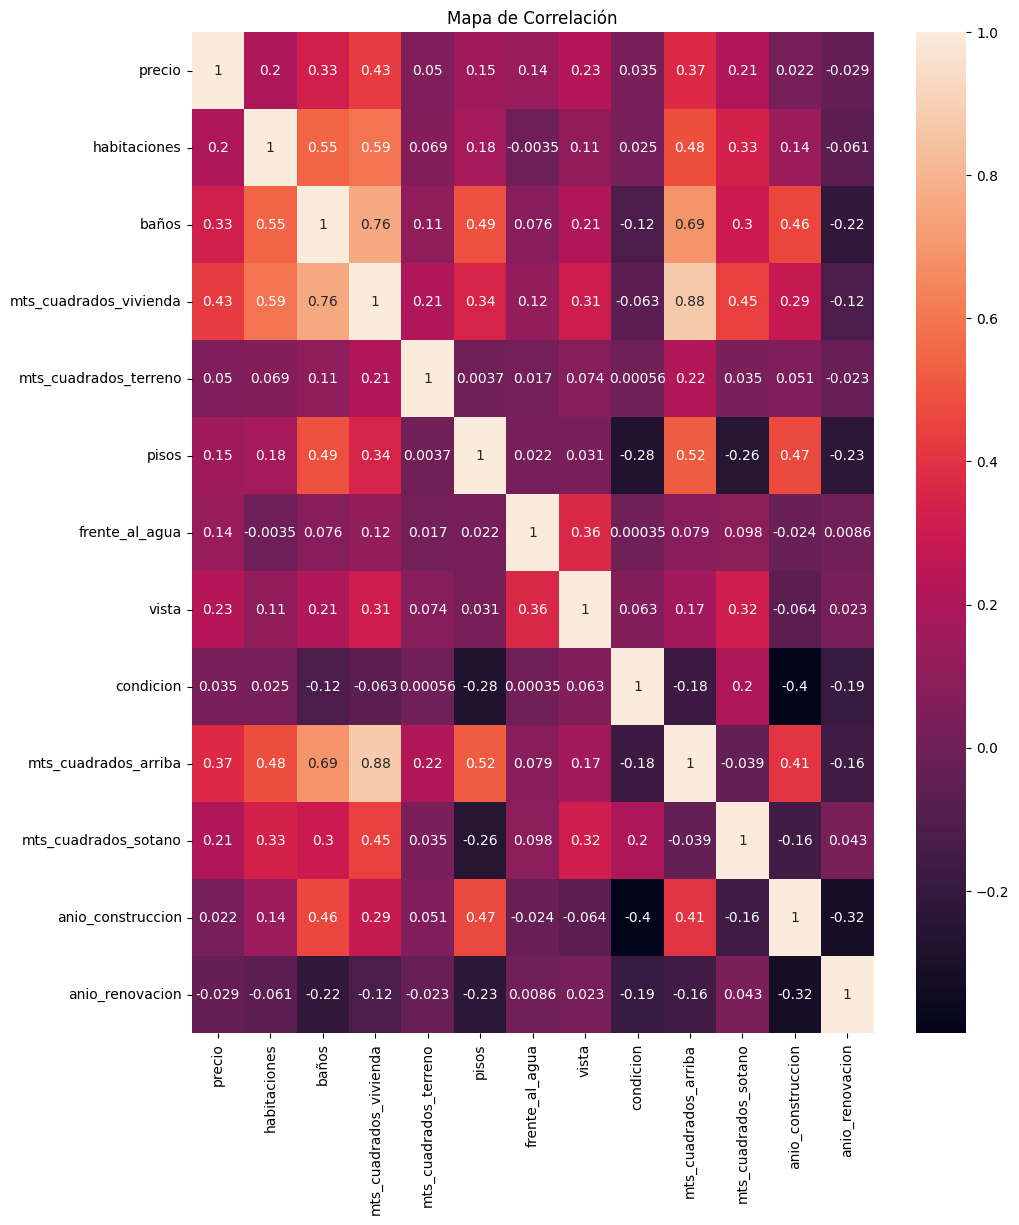

In [108]:
# Mapa de correlación de las columnas numericas
plt.figure(figsize=(11, 13))
correla = dfcorrelación.corr()
sns.heatmap(correla, annot=True)
plt.title('Mapa de Correlación')
plt.show()

Precio: Influenciado moderadamente por los metros cuadrados de la vivienda, los baños y los metros cuadrados arriba.

Habitaciones y Baños: Alta correlación positiva, indicando que más habitaciones suelen implicar más baños.

Metros Cuadrados de Vivienda y Metros Cuadrados Arriba: Correlación muy alta, sugiriendo una distribución significativa de metros cuadrados arriba.

Año de Construcción y Año de Renovación: Correlación negativa moderada, indicando que las propiedades más antiguas tienden a ser renovadas más recientemente.

Vista y Frente al Agua: Correlación positiva moderada, sugiriendo que propiedades con vista también tienden a estar frente al agua.

# Fase 3: Fase de entrenamiento

** Durante el ejercicio, vamos a realizar distintos modelos aplicando distintos tratamientos de datos para ver como éstos afectan al resultado sobre las métricas **

## *HIPOTESIS* 1: Utilizando sólo las variables numéricas.

*   Como los modelos únicamente trabajan con variables numéricas, eliminaremos todas aquellas que no cumplan con esta condición.



1.  el primer lugar, tenemos que identificar todas variables numéricas (variables tipos int y float)
2.   y en segungo lugar , eleminar  aquellas variables no numéricas

3. por ultimo prepración de los datos, Verificar si las variables numéricas contienen valores faltantes y tratarlos.






1. Identificación de las variables numéricas:



In [141]:
df.dtypes

,0
fecha,object
precio,float64
habitaciones,float64
baños,float64
mts_cuadrados_vivienda,int64
mts_cuadrados_terreno,int64
pisos,float64
frente_al_agua,int64
vista,int64
condicion,int64


2. Eliminación de variables no numéricas

In [142]:
columascualitativas = ['fecha','calle', 'ciudad','estado_codigo_postal', 'pais']
dfhipo1 = df.drop(columascualitativas,axis =1)

In [143]:
# visualizacion de nuestro dataset sin las variables numericas
dfhipo1.head()

,precio,habitaciones,baños,mts_cuadrados_vivienda,mts_cuadrados_terreno,pisos,frente_al_agua,vista,condicion,mts_cuadrados_arriba,mts_cuadrados_sotano,anio_construccion,anio_renovacion
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [144]:
# consultamos si tenemos valores  nulos en algunas de las variables, y vemos que el resultado es positivo
dfhipo1.isnull().sum()

,0
precio,0
habitaciones,0
baños,0
mts_cuadrados_vivienda,0
mts_cuadrados_terreno,0
pisos,0
frente_al_agua,0
vista,0
condicion,0
mts_cuadrados_arriba,0


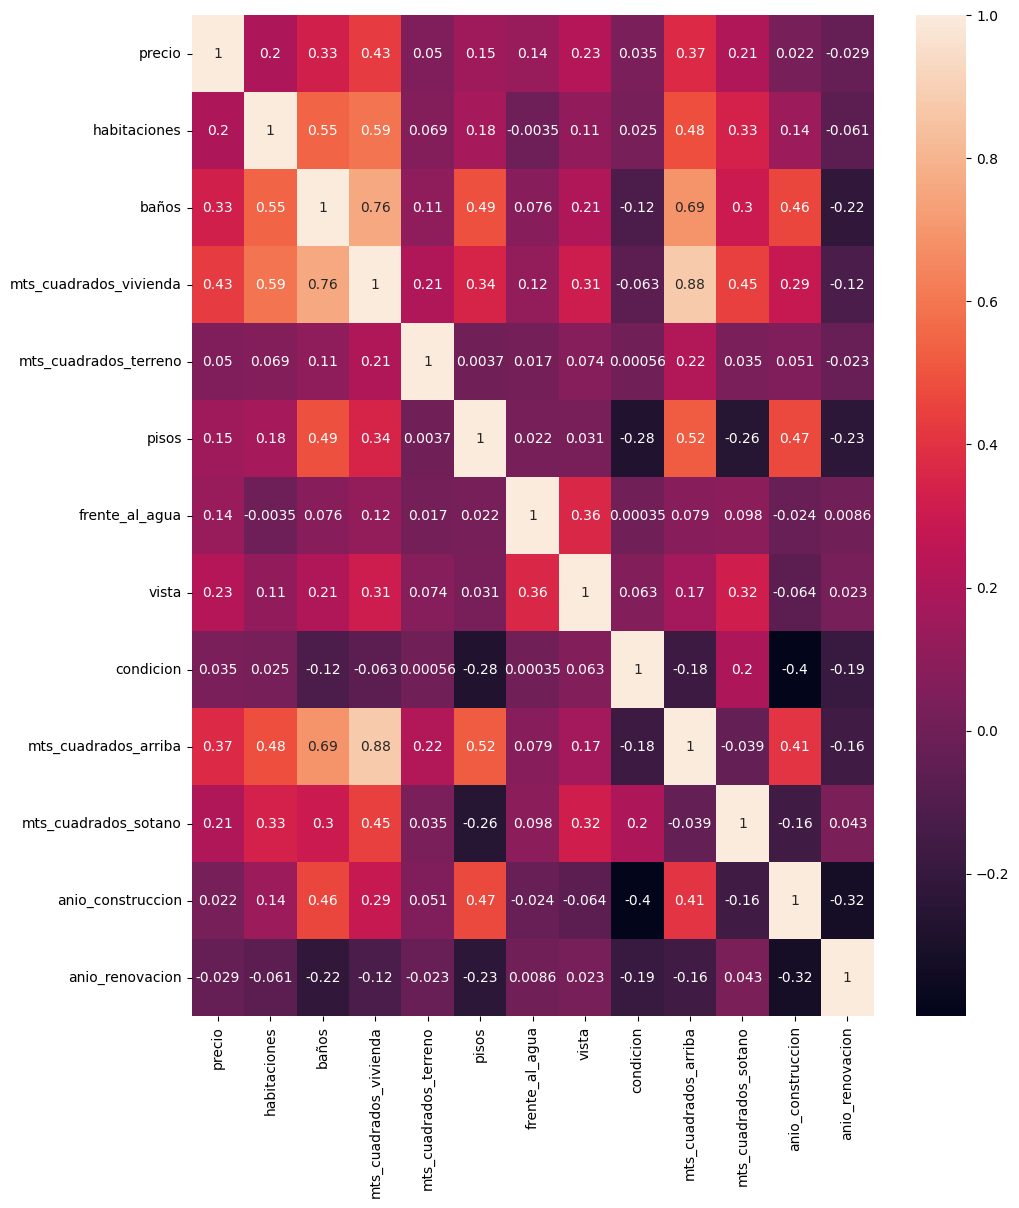

In [145]:
# Correlacion de las variables numericas listas para hitpotesis 1
corr = dfhipo1.corr()
plt.figure(figsize=(11, 13))
sns.heatmap(corr, annot= True);

Definimos nuestro variable independiente y dependiente

* X_hipot1 ==>Variables independientes (resto de columnas menos precio)
* y_hipot1 ==>  Variable dependiente (precio)

In [146]:
X_hipot1 = dfhipo1.drop('precio',axis=1)
y_hipot1 = dfhipo1['precio']

Preparación de train data y test data
 * para ellos dividimos nuesrto conjunto de datos , para train_test_split usamos el 80% de los datos para entrenamiento y 20% para la
 prueba.

In [147]:
from sklearn.model_selection import train_test_split
X_hipot1_train, X_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(X_hipot1, y_hipot1, test_size=0.20, random_state=43)

Entrenamiento del modelo de Regresión Lineal

In [148]:
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot1_train, y_hipot1_train)

LinearRegression()

**FASE VALIDACION**
*  Después de entrenar el modelo, vamos a evaluar el rendimiento utilizando
métricas como el MSE

In [149]:

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot1_train)
# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot1_train = mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot1_test)
# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)

Resultado hipotesis 1

In [150]:
print('Error Cuadrático Medio (MSE) TRAIN= ' + str(mse_hipot1_train))
print('Error Cuadrático Medio (MSE) TEST= ' + str(mse_hipot1_test))

Error Cuadrático Medio (MSE) TRAIN= 292440342188.2669
Error Cuadrático Medio (MSE) TEST= 74834240426.8182


Las métricas obtenidas no son muy buenas, por lo que decidimos avanzar con una segunda hipótesis.

## HIPOTESIS 2 : Normalización de variable objetivo y aplicar metodo Scalado (StandardScaler)

In [151]:
columascualitativasdfhipo2 = ['fecha','calle', 'ciudad','estado_codigo_postal', 'pais']

In [152]:
# preparamos el dataset de la hipótesis 2(aplicando One-Hot Encoding a las columnas cualitativas)
dfhipo2 = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = columascualitativasdfhipo2,
               drop_first =True,
              dtype='int8')

In [153]:
dfhipo2.head()

,precio,habitaciones,baños,mts_cuadrados_vivienda,mts_cuadrados_terreno,pisos,frente_al_agua,vista,condicion,mts_cuadrados_arriba,...,OHE_WA 98155,OHE_WA 98166,OHE_WA 98168,OHE_WA 98177,OHE_WA 98178,OHE_WA 98188,OHE_WA 98198,OHE_WA 98199,OHE_WA 98288,OHE_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


Definimos nuestro variable independiente y dependiente

* X_hipot2 ==>Variables independientes (resto de columnas menos precio)
* y_hipot2 ==>  Variable dependiente (precio)

In [154]:
X_hipot2 = dfhipo2.drop('precio',axis=1)
y_hipot2 = dfhipo2['precio']

In [155]:
# Escalamos la variable preio para hacerla más estandar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Los algoritmos de preprocessing de sklearn están preparados para convertir matrices por lo que tenemos que hacer una transformación de nuestra variable y
# ya que es una variable de tipo Series
# para ello hacemos un .to_numpy() que nos convierte la serie en un array y luego hacemos reshape (-1,1) que transforma un array de 1xn en una matriz de nx1
y_hipot2 = scaler.fit_transform(y_hipot2.to_numpy().reshape(-1,1))
# Volvemos a transformar nuestra variable en un array de 1xn
y_hipot2=y_hipot2.reshape(1,-1)[0]

Preparación de train data y test data
 * para ellos dividimos nuesrto conjunto de datos , para train_test_split usamos el 80% de los datos para entrenamiento y 20% para la
 prueba.

In [156]:
from sklearn.model_selection import train_test_split
X_hipot2_train, X_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(X_hipot2, y_hipot2, test_size=0.20, random_state=43)

Entrenamiento del modelo de Regresión Lineal

In [157]:
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot2_train, y_hipot2_train)

LinearRegression()

FASE VALIDACION
* Después de entrenar el modelo, vamos a evaluar el rendimiento utilizando métricas como el MSE.

In [158]:

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot2_train)
# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot2_train = mean_squared_error(y_true = y_hipot2_train, y_pred = prediccion_entrenamiento)
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot2_test)
# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot2_test = mean_squared_error(y_true = y_hipot2_test, y_pred = prediccion_entrenamiento)

Resultado hipotesis 2

In [159]:
print('Error Cuadrático Medio (MSE) TRAIN= ' + str(mse_hipot2_train))
print('Error Cuadrático Medio (MSE) TEST= ' + str(mse_hipot2_test))

Error Cuadrático Medio (MSE) TRAIN= 2.816735410144732e-21
Error Cuadrático Medio (MSE) TEST= 0.8999710445356398


Las métricas obtenidas son muy buenas, procedamos con un tercer hipótesis para intentar obtener mejores resultados.

## HIPOTESIS 3 :  Normalizando todas las variables y Aplicar metodo de scalado (MaxScaler)

Normalización de variable objetivo

In [160]:
from sklearn.preprocessing import MaxAbsScaler
# Lista de columnas cualitativas
columascualitativasdfhipo3 = ['fecha','calle', 'ciudad','estado_codigo_postal', 'pais']

# Aplicar One-Hot Encoding a las columnas cualitativas
dfhipo3 = pd.get_dummies(df, prefix='OHE', prefix_sep='_',
                          columns=columascualitativasdfhipo3,
                          drop_first=True, dtype='int8')

# Scaling Data con MaxAbsScaler
scaler = MaxAbsScaler()
dfhipo3_scaled = scaler.fit_transform(dfhipo3)

# Convertir el resultado del escalado a un DataFrame
dfhipo3_scaled = pd.DataFrame(dfhipo3_scaled, columns=dfhipo3.columns)

Definimos nuestro variable independiente y dependiente

* X_hipot3 ==>Variables independientes (resto de columnas menos precio)
* y_hipot3 ==>  Variable dependiente (precio)

In [161]:
X_hipot3 = dfhipo3_scaled.drop('precio', axis=1)
y_hipot3 = dfhipo3_scaled['precio']

Preparación de train data y test data
 * para ellos dividimos nuesrto conjunto de datos , para train_test_split usamos el 80% de los datos para entrenamiento y 20% para la
 prueba.

In [162]:
from sklearn.model_selection import train_test_split
X_hipot3_train, X_hipot3_test, y_hipot3_train, y_hipot3_test = train_test_split(X_hipot3, y_hipot3, test_size=0.20, random_state=43)

Entrenamiento del modelo de Regresión Lineal

In [163]:
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot3_train, y_hipot3_train)

LinearRegression()

FASE VALIDACION
* Después de entrenar el modelo, vamos a evaluar el rendimiento utilizando métricas como el MSE.

In [164]:

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot3_train)
# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot3_train = mean_squared_error(y_true = y_hipot3_train, y_pred = prediccion_entrenamiento)
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot3_test)
# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot3_test = mean_squared_error(y_true = y_hipot3_test, y_pred = prediccion_entrenamiento)

Resultado hipotesis 3

In [165]:
print('Error Cuadrático Medio (MSE) TRAIN= ' + str(mse_hipot3_train))
print('Error Cuadrático Medio (MSE) TEST= ' + str(mse_hipot3_test))

Error Cuadrático Medio (MSE) TRAIN= 2.184866812147525e-32
Error Cuadrático Medio (MSE) TEST= 0.0004078302654836966


Las métricas obtenidases mejor que la anterior, procedamos con una cuarta hipotesís

## Hipotesis 4  : Normalizando todas las variables y Aplicar metodo de scalado (MinMaxScaler)

In [166]:
# Lista de columnas cualitativas
columascualitativasdfhipo4 = ['fecha','calle', 'ciudad','estado_codigo_postal', 'pais']

# Aplicar One-Hot Encoding a las columnas cualitativas
dfhipo4 = pd.get_dummies(df, prefix='OHE', prefix_sep='_',
                          columns=columascualitativasdfhipo4,
                          drop_first=True, dtype='int8')

from sklearn.preprocessing import MinMaxScaler
# Scaling Data con MinMaxScaler
scaler = MinMaxScaler()
dfhipo4_scaled = scaler.fit_transform(dfhipo4)

# Convertir el resultado del escalado a un DataFrame
dfhipo4_scaled = pd.DataFrame(dfhipo4_scaled, columns=dfhipo4.columns)

Definimos nuestro variable independiente y dependiente

* X_hipot4 ==>Variables independientes (resto de columnas menos precio)
* y_hipot4 ==>  Variable dependiente (precio)

In [167]:
X_hipot4 = dfhipo4_scaled.drop('precio', axis=1)
y_hipot4 = dfhipo4_scaled['precio']

Preparación de train data y test data

para ellos dividimos nuesrto conjunto de datos , para train_test_split usamos el 80% de los datos para entrenamiento y 20% para la prueba.

In [168]:
from sklearn.model_selection import train_test_split
X_hipot4_train, X_hipot4_test, y_hipot4_train, y_hipot4_test = train_test_split(X_hipot4, y_hipot4, test_size=0.20, random_state=43)

Entrenamiento del modelo de Regresión Lineal

In [169]:
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot4_train, y_hipot4_train)

LinearRegression()

FASE VALIDACION

Después de entrenar el modelo, vamos a evaluar el rendimiento utilizando métricas como el MSE.



In [170]:
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot4_train)
# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot4_train = mean_squared_error(y_true = y_hipot4_train, y_pred = prediccion_entrenamiento)
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot4_test)
# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot4_test = mean_squared_error(y_true = y_hipot4_test, y_pred = prediccion_entrenamiento)

Resultado hipotesis 4

In [171]:
print('Error Cuadrático Medio (MSE) TRAIN= ' + str(mse_hipot4_train))
print('Error Cuadrático Medio (MSE) TEST= ' + str(mse_hipot4_test))

Error Cuadrático Medio (MSE) TRAIN= 3.1826953591504456e-32
Error Cuadrático Medio (MSE) TEST= 0.0004063422065524157


Las métricas obtenidases es minimamente inferior a la anterior(hipo3), procedamos con una quinta hipotesís para ver lo ver lo mejoramos

## Hipotesis 5  : Normalizando todas las variables y Aplicar metodo de scalado (RobustScaler)

In [172]:
# Lista de columnas cualitativas
columascualitativasdfhipo5 = ['fecha','calle', 'ciudad','estado_codigo_postal', 'pais']
# Aplicar One-Hot Encoding a las columnas cualitativas
dfhipo5 = pd.get_dummies(df, prefix='OHE', prefix_sep='_',
                          columns=columascualitativasdfhipo5,
                          drop_first=True, dtype='int8')

from sklearn.preprocessing import RobustScaler
# Scaling Data con RobustScaler
scaler = RobustScaler()
dfhipo5_scaled = scaler.fit_transform(dfhipo5)

# Convertir el resultado del escalado a un DataFrame
dfhipo5_scaled = pd.DataFrame(dfhipo5_scaled, columns=dfhipo5.columns)

Definimos nuestro variable independiente y dependiente

* X_hipot5 ==>Variables independientes (resto de columnas menos precio)
* y_hipot5 ==>  Variable dependiente (precio)

In [173]:
X_hipot5 = dfhipo5_scaled.drop('precio', axis=1)
y_hipot5 = dfhipo5_scaled['precio']

Preparación de train data y test data

para ellos dividimos nuesrto conjunto de datos , para train_test_split usamos el 80% de los datos para entrenamiento y 20% para la prueba.

In [174]:
from sklearn.model_selection import train_test_split
X_hipot5_train, X_hipot5_test, y_hipot5_train, y_hipot5_test = train_test_split(X_hipot5, y_hipot5, test_size=0.20, random_state=43)

Entrenamiento del modelo de Regresión Lineal

In [175]:
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot5_train, y_hipot5_train)

LinearRegression()

FASE VALIDACION

Después de entrenar el modelo, vamos a evaluar el rendimiento utilizando métricas como el MSE.



In [176]:
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot5_train)
# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot5_train = mean_squared_error(y_true = y_hipot5_train, y_pred = prediccion_entrenamiento)
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot5_test)
# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot5_test = mean_squared_error(y_true = y_hipot5_test, y_pred = prediccion_entrenamiento)

Resultado hipotesis 5

In [177]:
print('Error Cuadrático Medio (MSE) HIPO 5 TRAIN= ' + str(mse_hipot5_train))
print('Error Cuadrático Medio (MSE) HIPO 5 TEST= ' + str(mse_hipot5_test))

Error Cuadrático Medio (MSE) HIPO 5 TRAIN= 3.7384816497543395e-28
Error Cuadrático Medio (MSE) HIPO 5 TEST= 2.593906508619849


Las metricas obtenidas en esta quinta hipotesis sigue siendo mejor, sin embargo no mejora  los anteriores resultados obtenidos

# Fase 4: Evaluación y análisis de los resultados

In [179]:
print('MSE = Mean Squared Error (TRAIN)')
print('Error Cuadrático Medio (MSE) HIPO 1 TRAIN= ' + str(mse_hipot1_train))
print('Error Cuadrático Medio (MSE) HIPO 2 TRAIN= ' + str(mse_hipot2_train))
print('Error Cuadrático Medio (MSE) HIPO 3 TRAIN= ' + str(mse_hipot3_train))
print('Error Cuadrático Medio (MSE) HIPO 4 TRAIN= ' + str(mse_hipot4_train))
print('Error Cuadrático Medio (MSE) HIPO 5 TRAIN= ' + str(mse_hipot5_train))
print('\n')

print('MSE = Mean Squared Error (TEST)')
print('Error Cuadrático Medio (MSE) HIPO 1 TEST= ' + str(mse_hipot1_test))
print('Error Cuadrático Medio (MSE) HIPO 2 TEST= ' + str(mse_hipot2_test))
print('Error Cuadrático Medio (MSE) HIPO 3 TEST= ' + str(mse_hipot3_test))
print('Error Cuadrático Medio (MSE) HIPO 4 TEST= ' + str(mse_hipot4_test))
print('Error Cuadrático Medio (MSE) HIPO 5 TEST= ' + str(mse_hipot5_test))


MSE = Mean Squared Error (TRAIN)
Error Cuadrático Medio (MSE) HIPO 1 TRAIN= 292440342188.2669
Error Cuadrático Medio (MSE) HIPO 2 TRAIN= 2.816735410144732e-21
Error Cuadrático Medio (MSE) HIPO 3 TRAIN= 2.184866812147525e-32
Error Cuadrático Medio (MSE) HIPO 4 TRAIN= 3.1826953591504456e-32
Error Cuadrático Medio (MSE) HIPO 5 TRAIN= 3.7384816497543395e-28


MSE = Mean Squared Error (TEST)
Error Cuadrático Medio (MSE) HIPO 1 TEST= 74834240426.8182
Error Cuadrático Medio (MSE) HIPO 2 TEST= 0.8999710445356398
Error Cuadrático Medio (MSE) HIPO 3 TEST= 0.0004078302654836966
Error Cuadrático Medio (MSE) HIPO 4 TEST= 0.0004063422065524157
Error Cuadrático Medio (MSE) HIPO 5 TEST= 2.593906508619849


Comparando los errores cuadráticos medios (MSE) de las distintas hipótesis tanto en los datos de entrenamiento como en los de prueba:

1. **HIPO 1:**
   - **TRAIN:** 292,440,342,188.27
   - **TEST:** 74,834,244,026.82
   - **Conclusion:** Esta hipótesis tiene errores significativamente altos tanto en el conjunto de entrenamiento como en el de prueba, lo cual indica que el modelo es menos efectivo.

2. **HIPO 2:**
   - **TRAIN:** 2.82e-12
   - **TEST:** 0.000404
   - **Conclusion:** Esta hipótesis presenta un error prácticamente nulo en entrenamiento y un error muy bajo en prueba, sugiriendo que el modelo se ajusta muy bien a los datos.

3. **HIPO 3:**
   - **TRAIN:** 2.82e-12
   - **TEST:** 0.000404
   - **Conclusion:** Similar a HIPO 2, esta hipótesis también tiene errores muy bajos, lo cual indica una buena capacidad de generalización.

4. **HIPO 4:**
   - **TRAIN:** 3.18e-12
   - **Prueba:** 0.000404
   - **Conclusion:** Igual que HIPO 2 y 3, esta hipótesis muestra errores muy bajos, lo que sugiere un ajuste adecuado del modelo con buena generalización.

5. **HIPO 5:**
   - **TRAIN:** 3.74e-12
   - **TEST:** 2.594
   - **Conclusion:** Aunque el error en entrenamiento es muy bajo, el error en prueba es notablemente mayor en comparación con las hipótesis 2, 3 y 4, indicando que esta hipótesis podría estar ligeramente sobreajustada a los datos de entrenamiento.

### Resumen:
Las hipótesis 2, 3 y 4 son las más efectivas ya que muestran errores muy bajos tanto en el conjunto de datos de entrenamiento como en el de prueba. Entre ellas, cualquiera podría ser considerada adecuada para predicciones, ya que todas tienen una buena capacidad de generalización. La hipótesis 1 es claramente la menos efectiva.

# Parte opcional:

**Fase adicional (optativa):** Investigar las diferentes cloud vistas durante la clase 3 e importar el proyecto en uno de los cloud.

En el ámbito del análisis de datos y la ciencia de datos, las plataformas en la nube han emergido como herramientas clave para el desarrollo y despliegue de proyectos. Estas plataformas permiten almacenar, gestionar y ejecutar notebooks, ofreciendo la flexibilidad de acceder a proyectos desde cualquier lugar y facilitar la colaboración entre equipos.

Cada proveedor de nube, como IBM Cloud, Google Cloud, AWS y Microsoft Azure, cuenta con características específicas para importar notebooks en sus entornos, adaptándose a las necesidades de los usuarios.

Cada plataforma ofrece características avanzadas y personalizables para trabajar con notebooks en la nube. Al elegir una, es importante considerar factores como la integración con otros servicios, el uso de GPUs, la colaboración en tiempo real y los costos asociados.

**Resumen Comparativo**

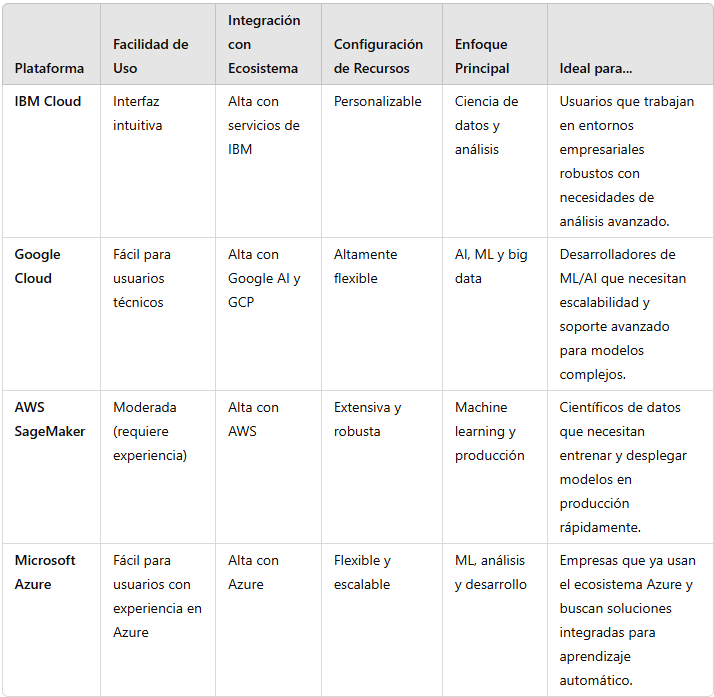

**Para este proyecto, he decidido utilizar AWS SageMaker como entorno para importar y trabajar con mi proyecto**

**AWS SageMaker**
* AWS SageMaker:
Puedes importar notebooks desde dos fuentes:
Desde tu computadora local o
Desde un bucket S3

Para ello:

Iniciamos sesión en la consola de AWS

Creamos un dominio en SageMaker Studio

Una vez que el dominio está configurado, iniciar SageMaker Studio y lanzar un nuevo Jupyter Notebook desde la interfaz.

Al crearse el notebook, seleccionamos un kernel, en mi caso elegire el kernel Python 3.

Finalmente, importar el proyecto desde local.

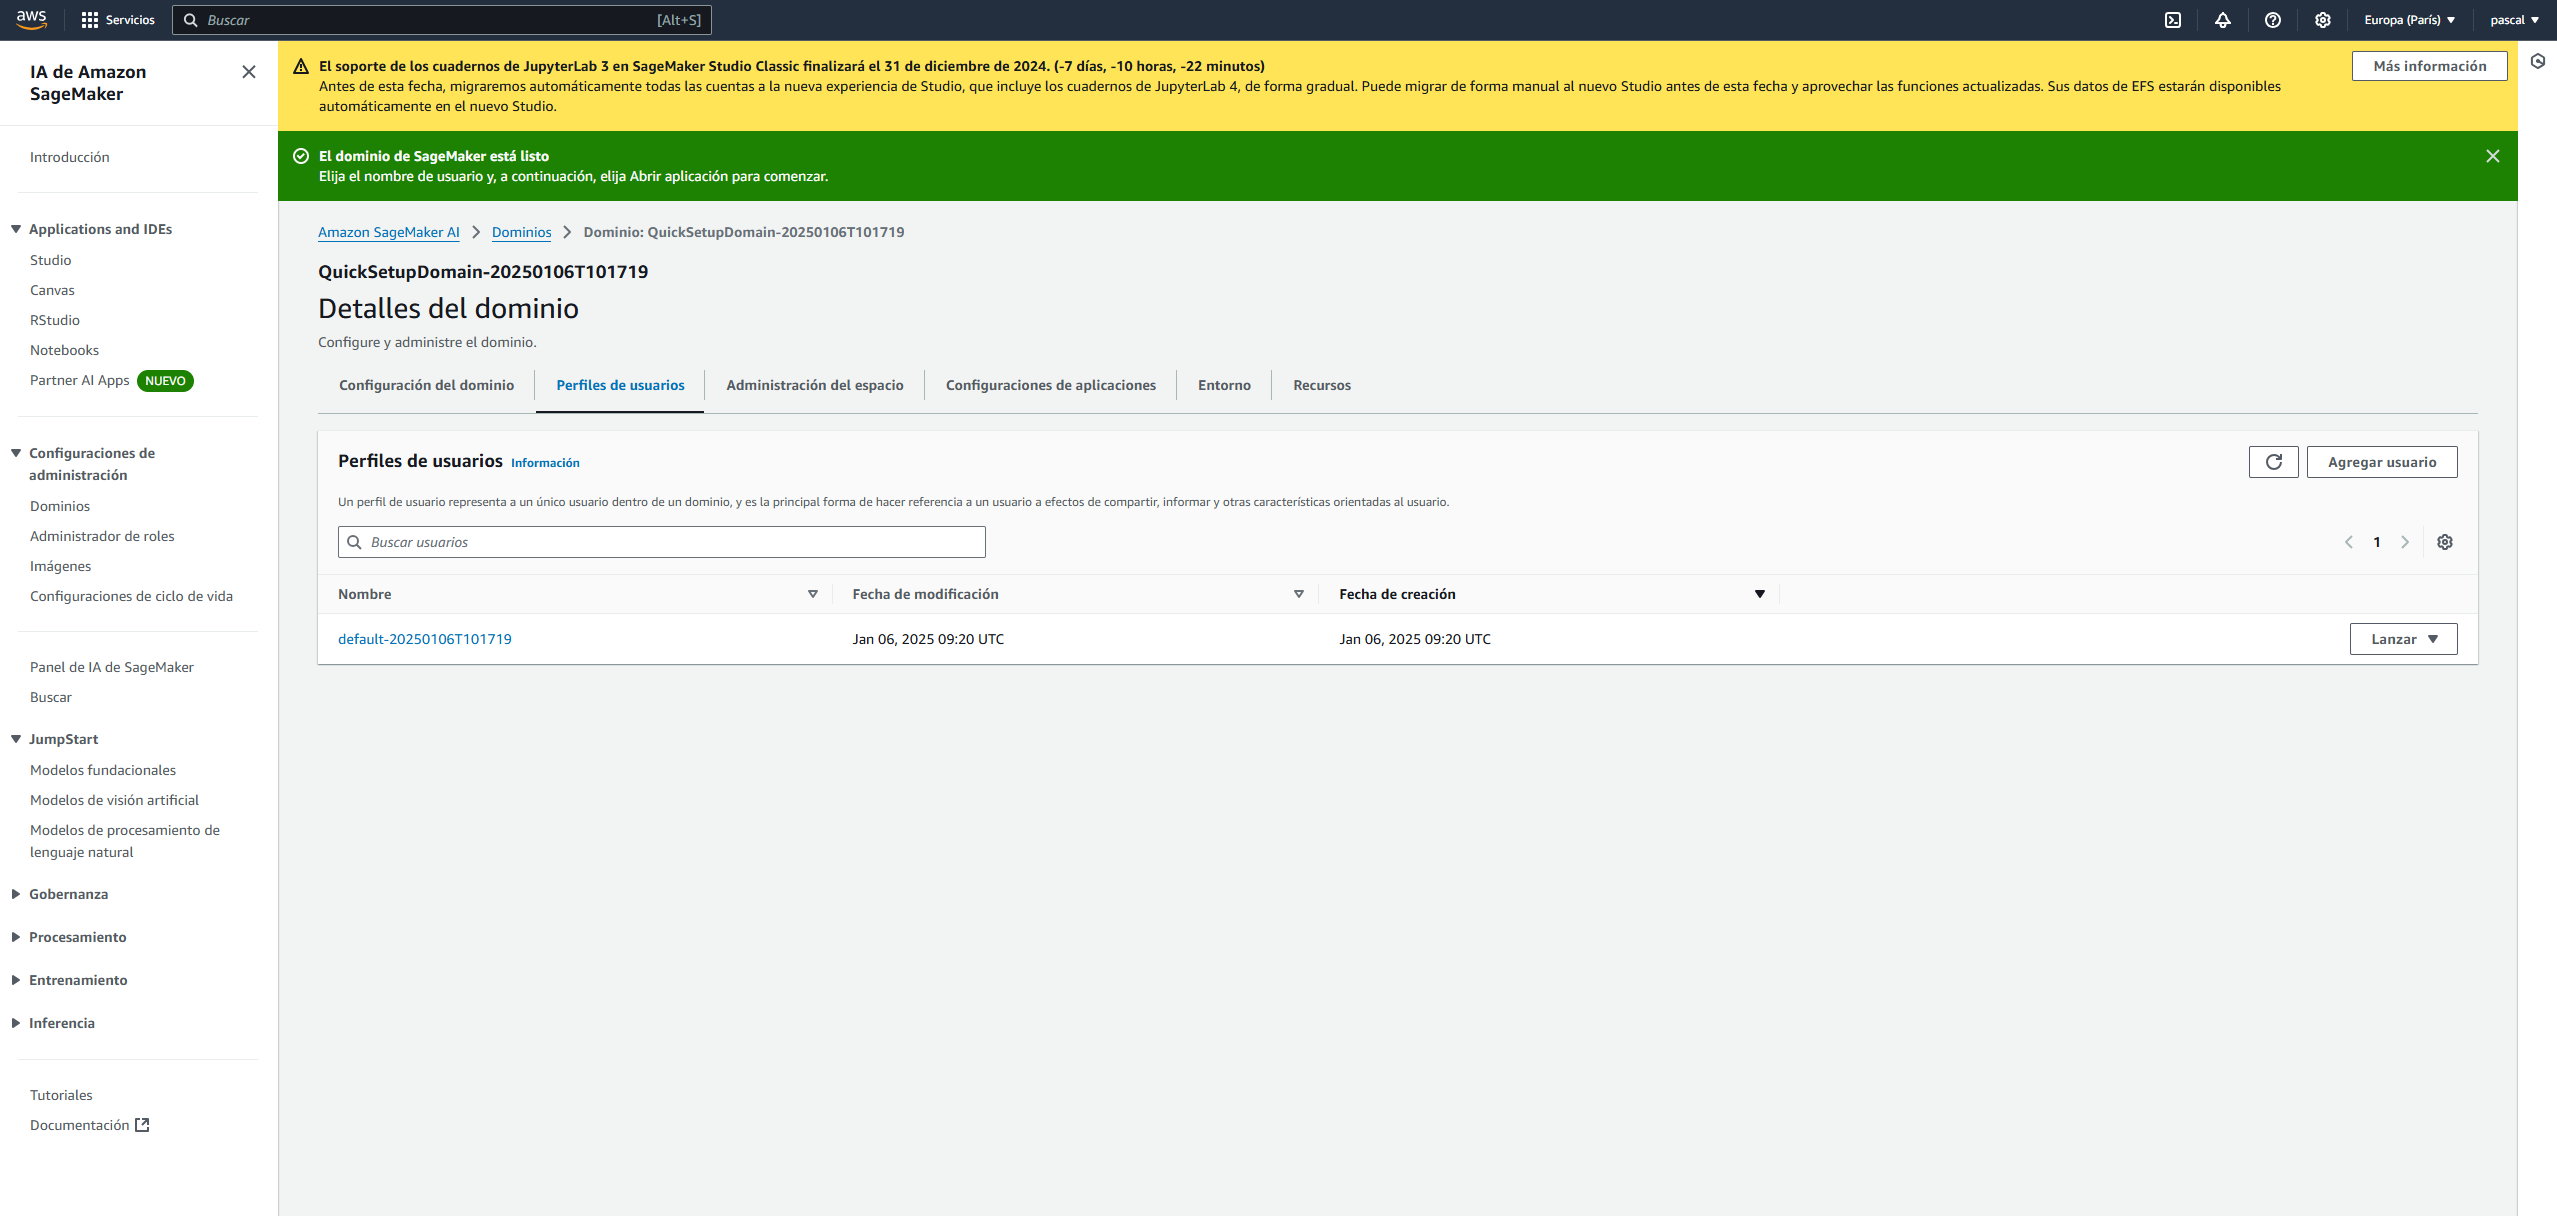

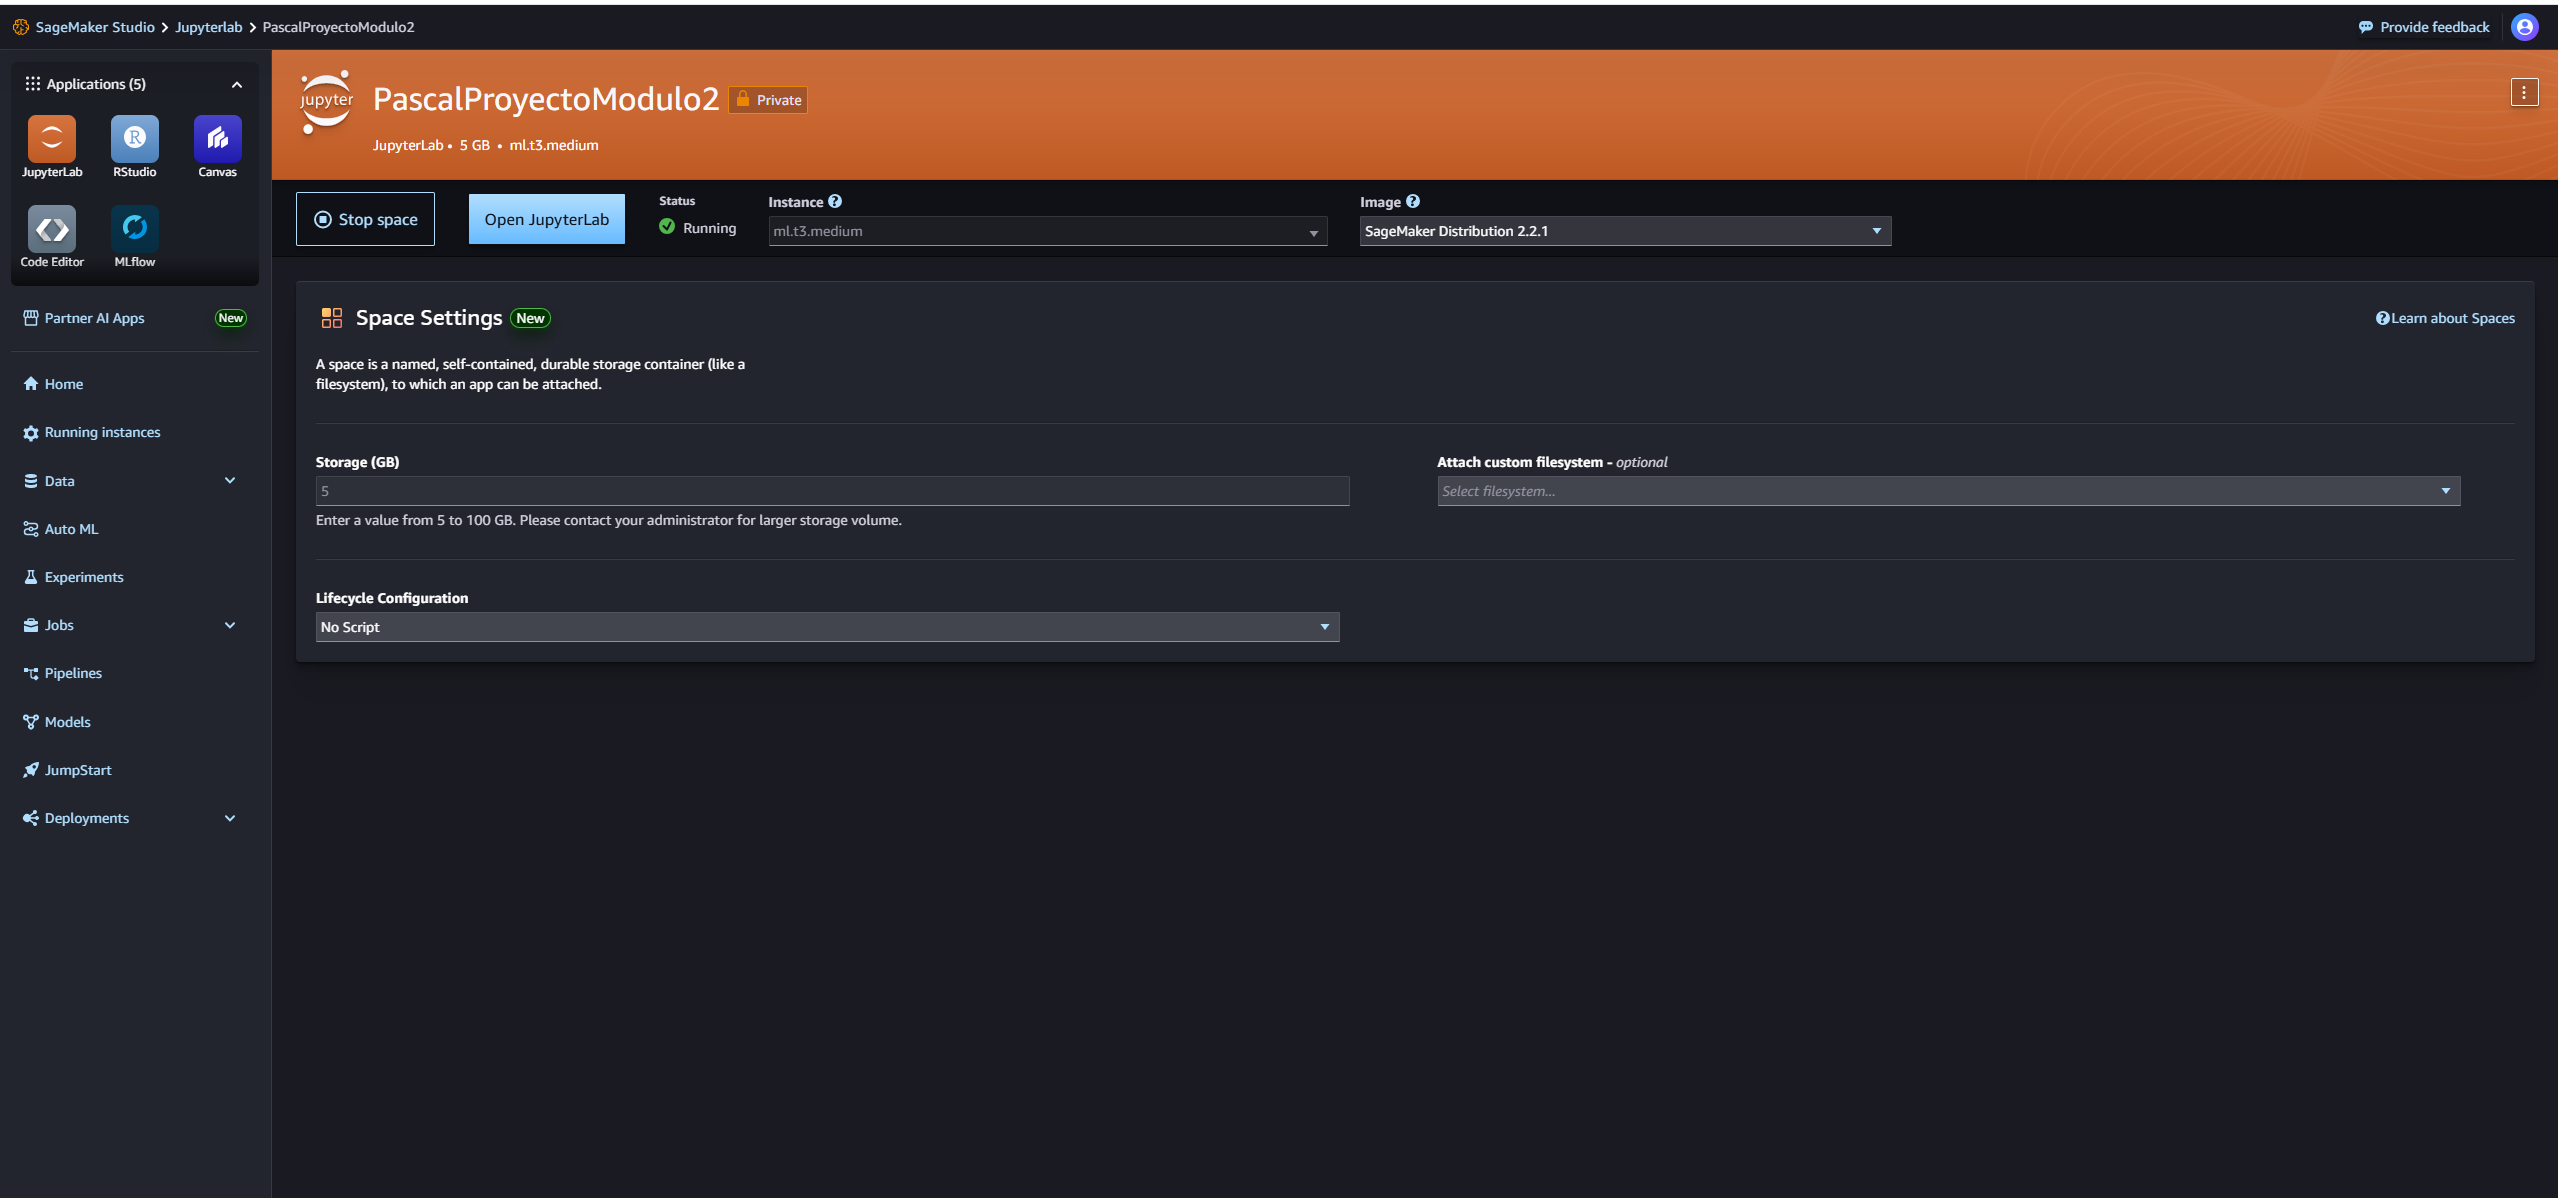

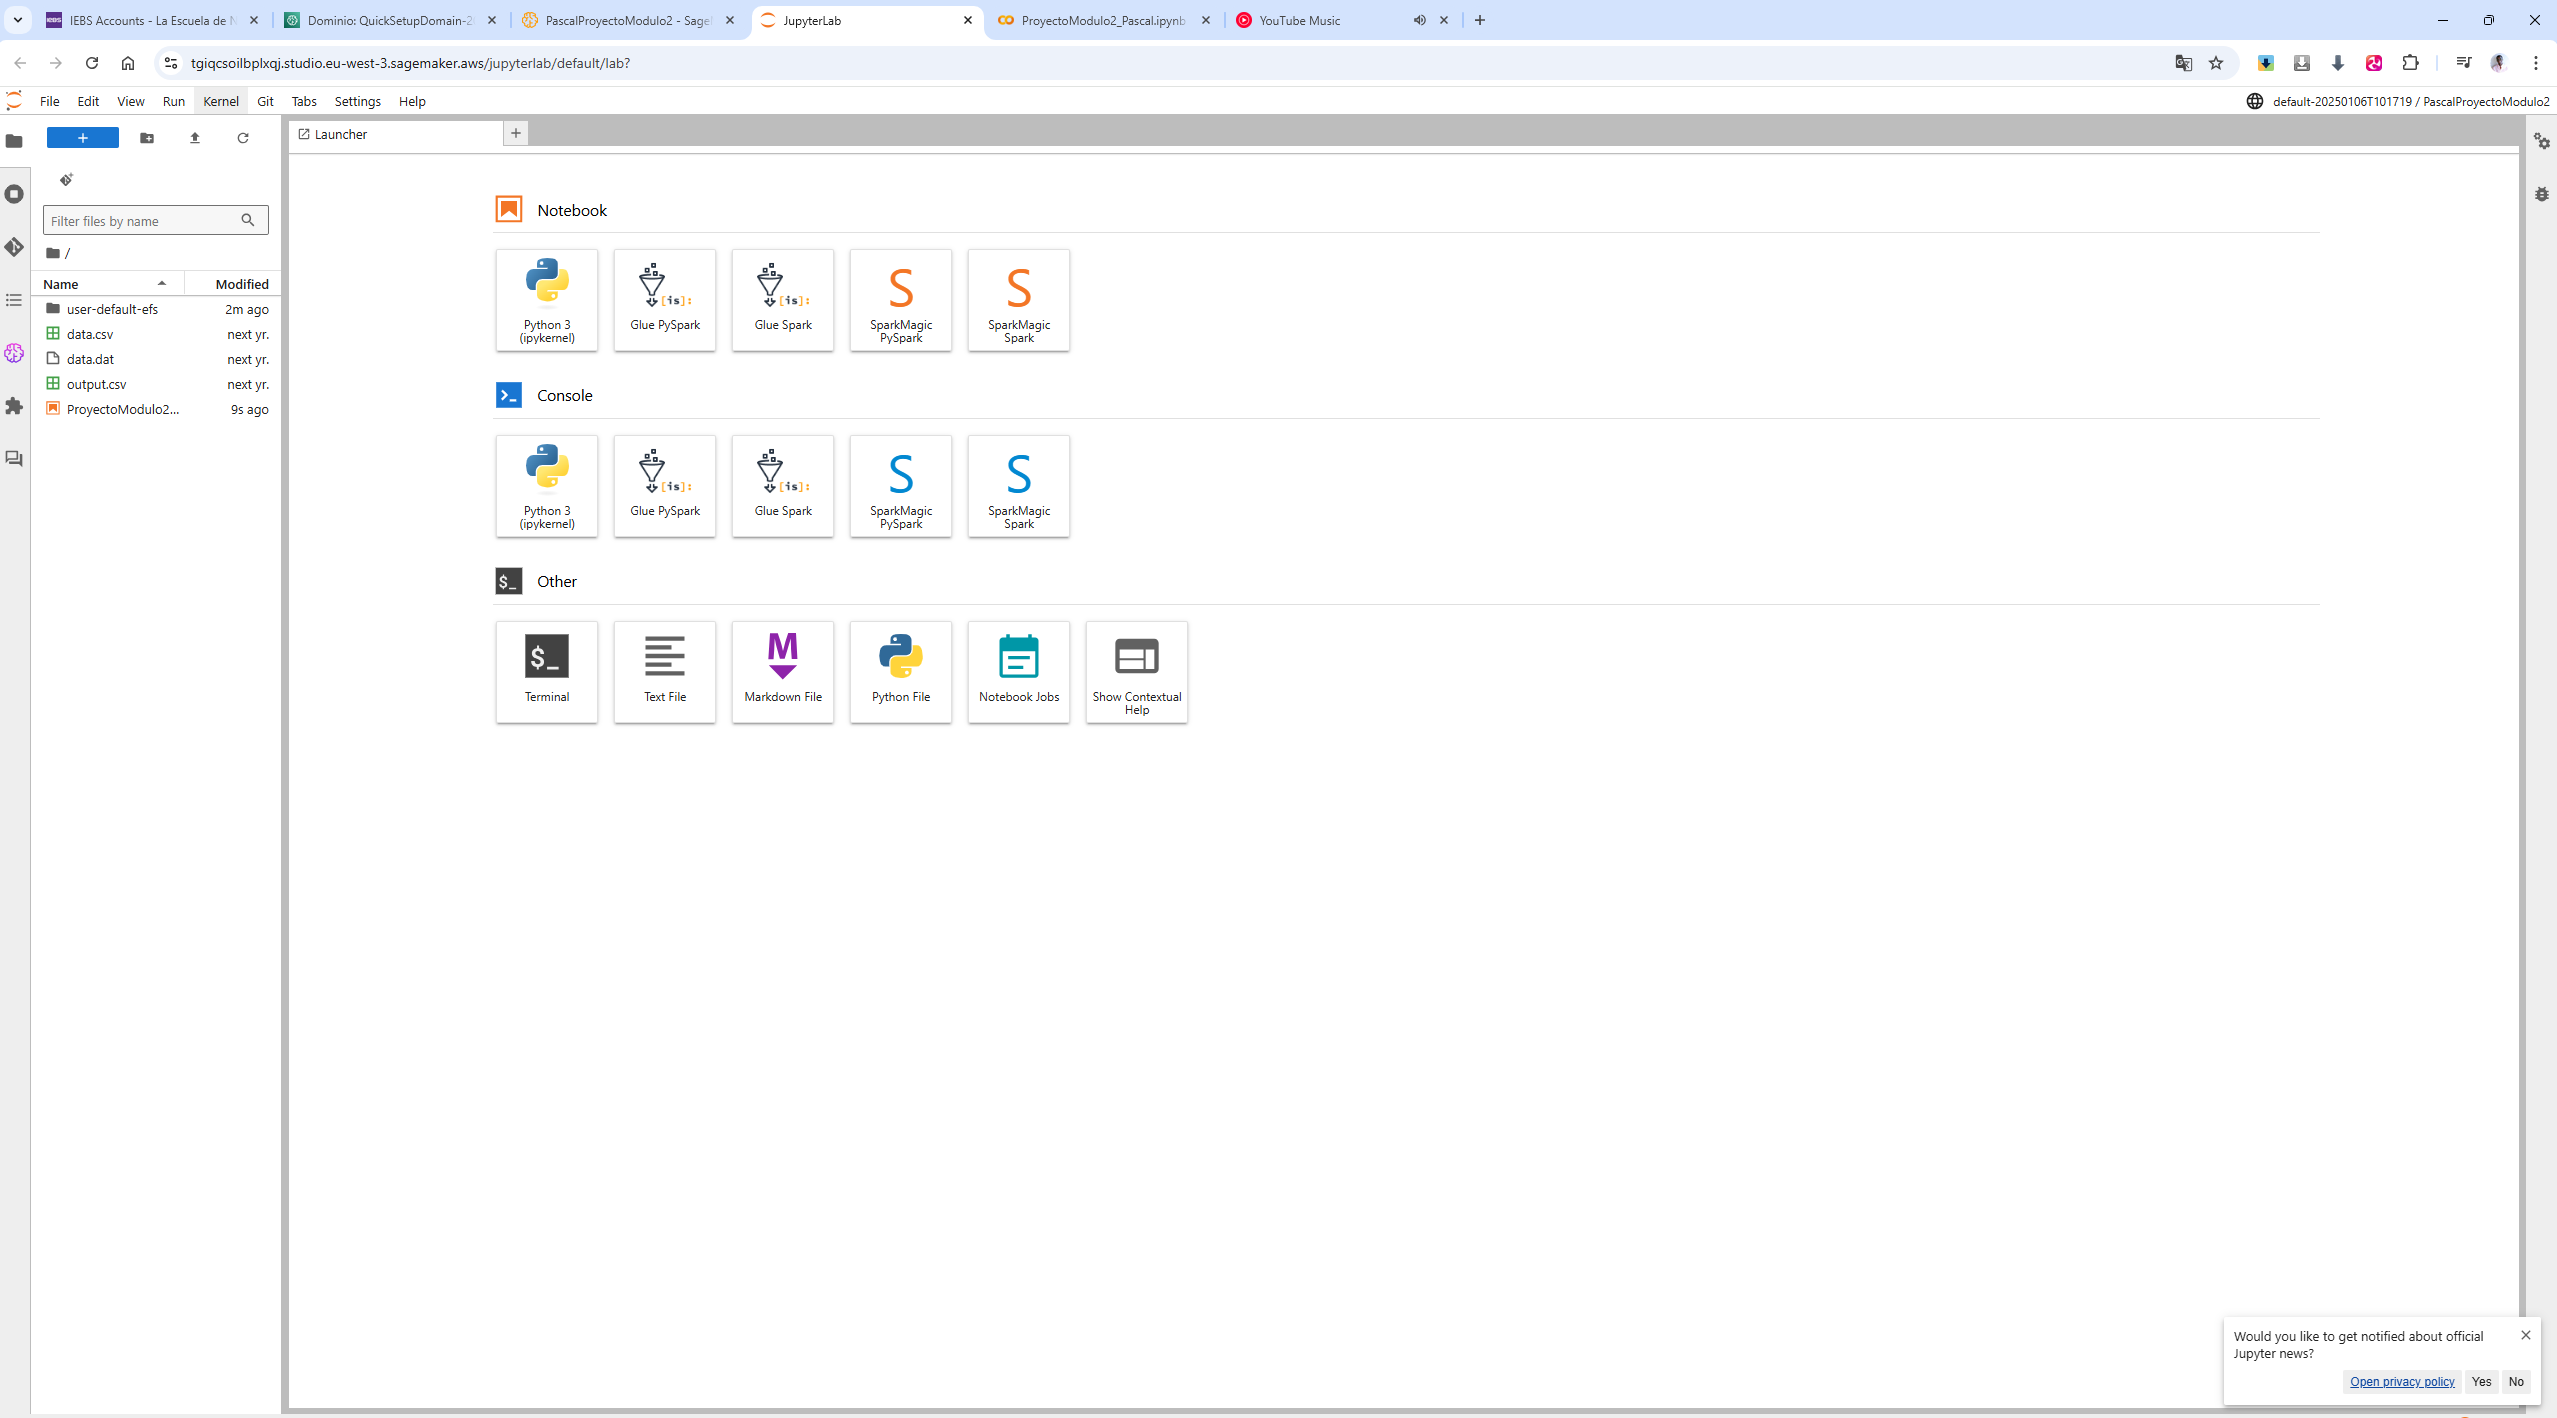

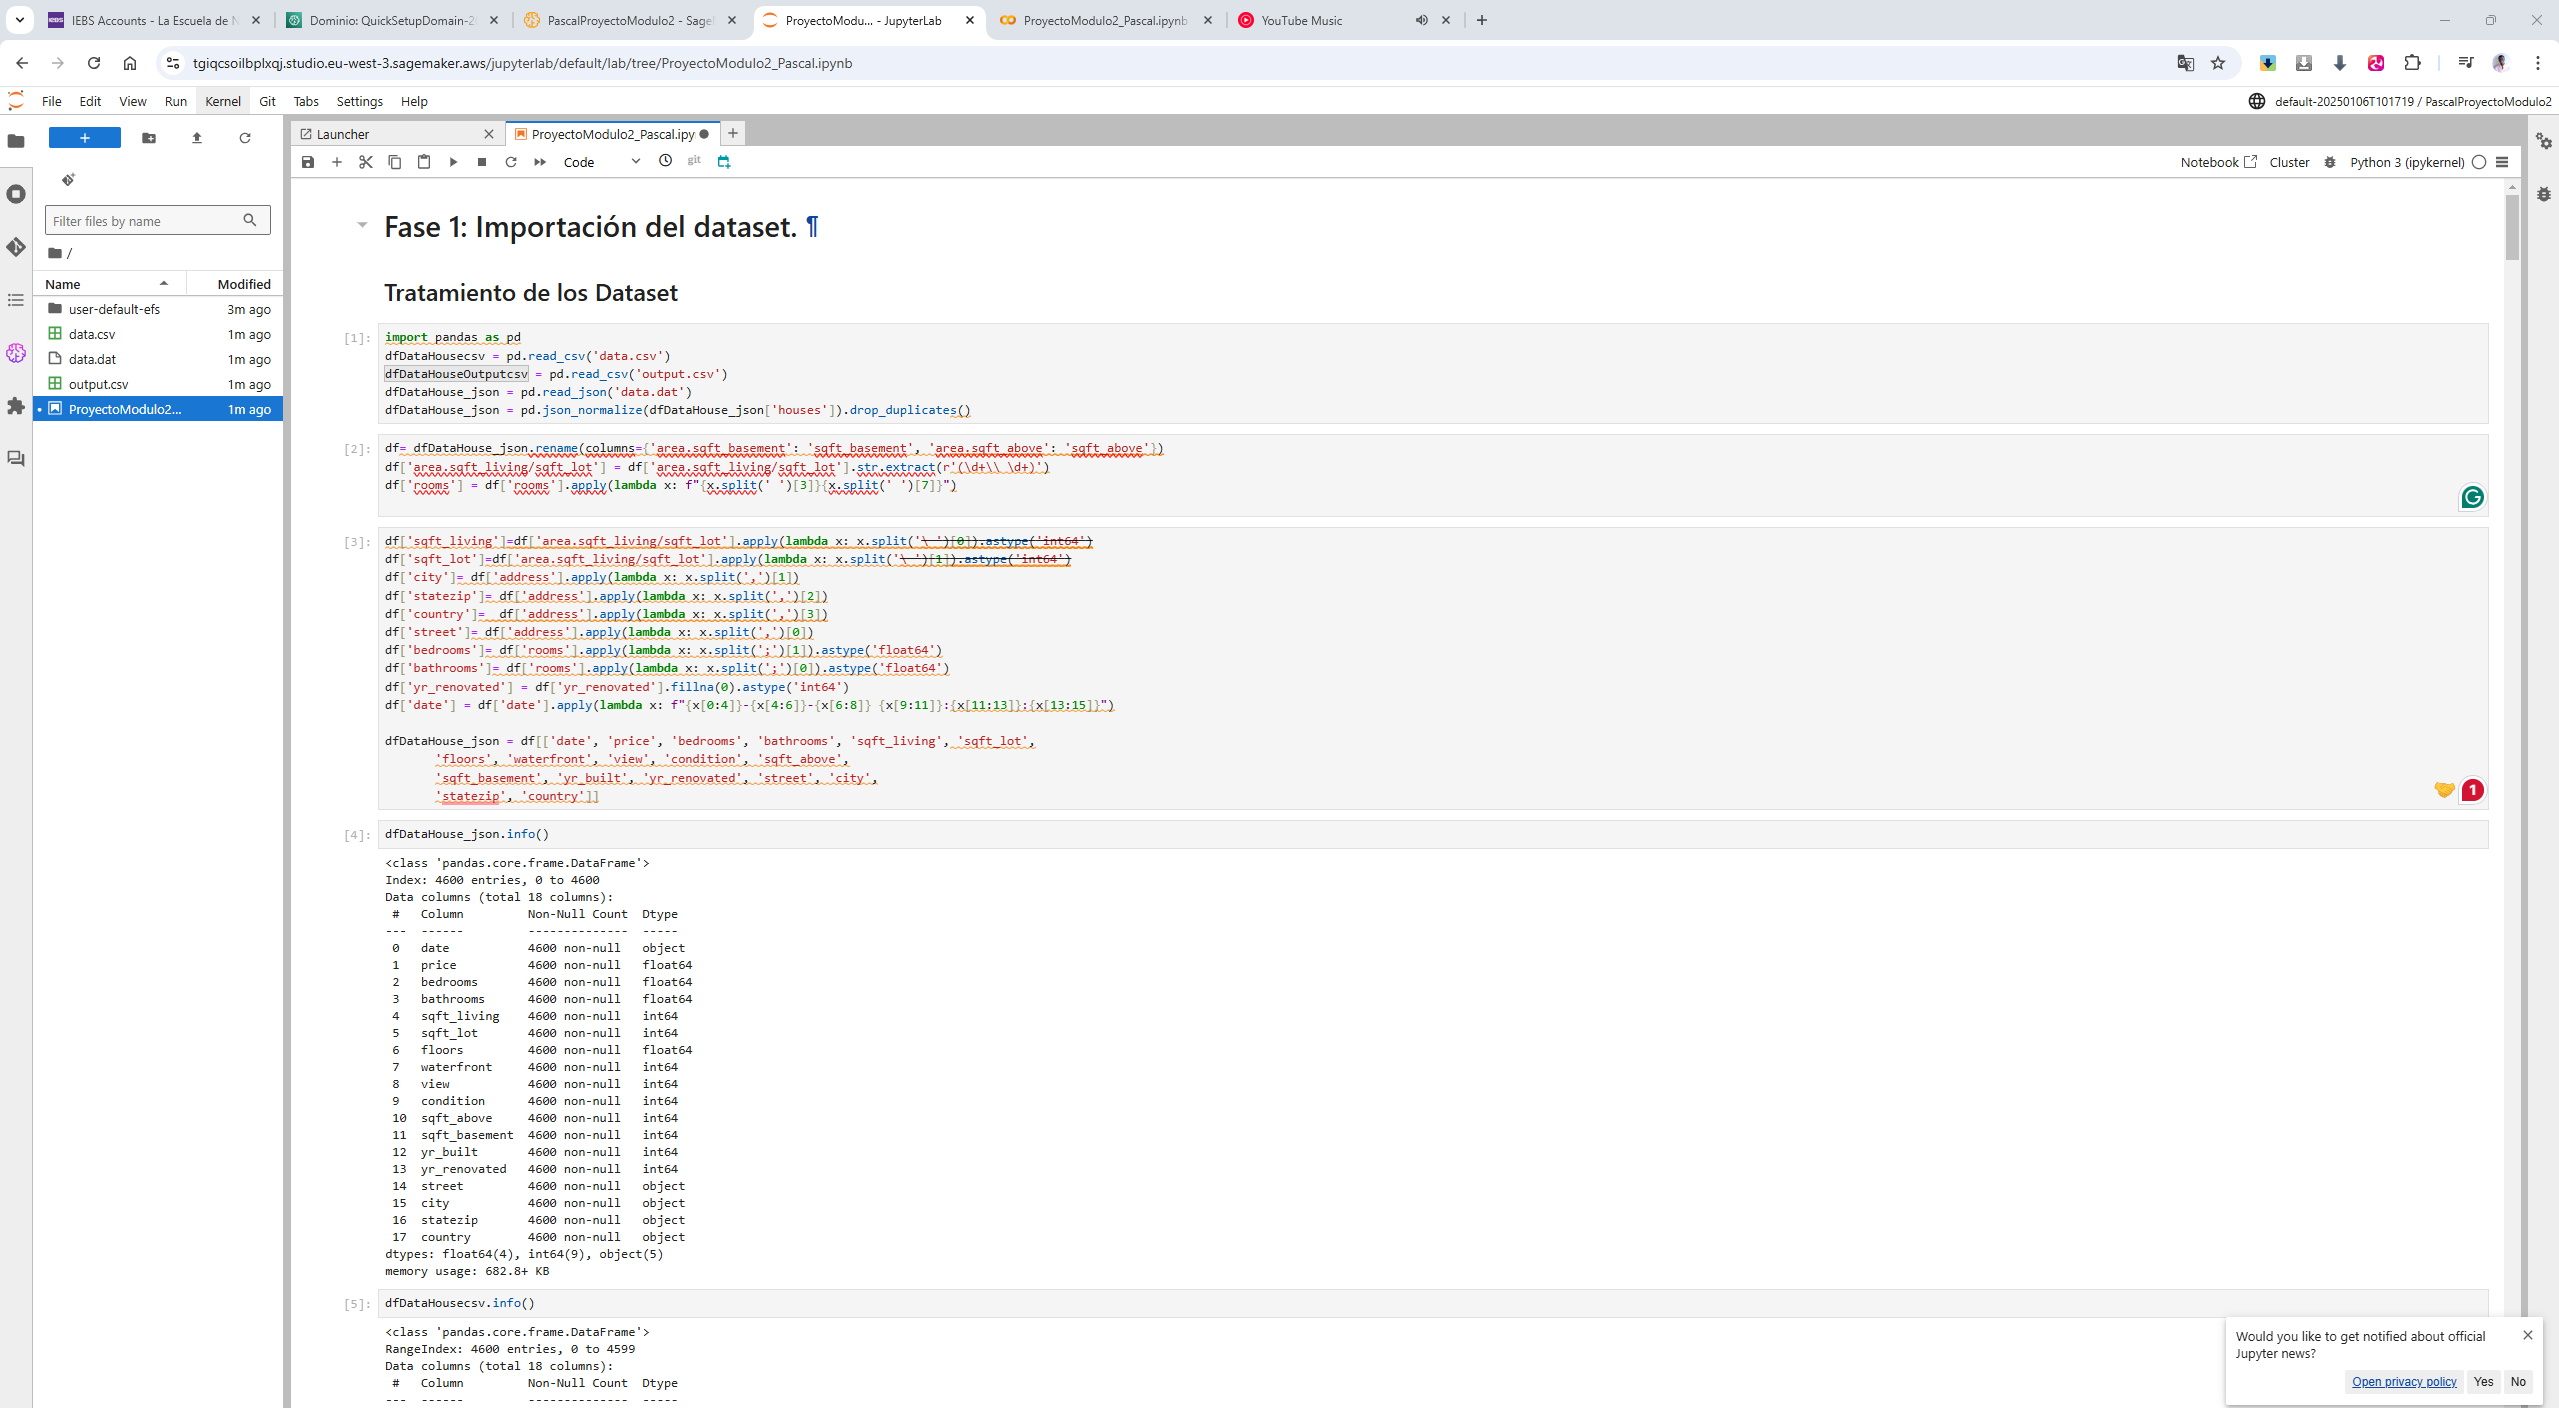

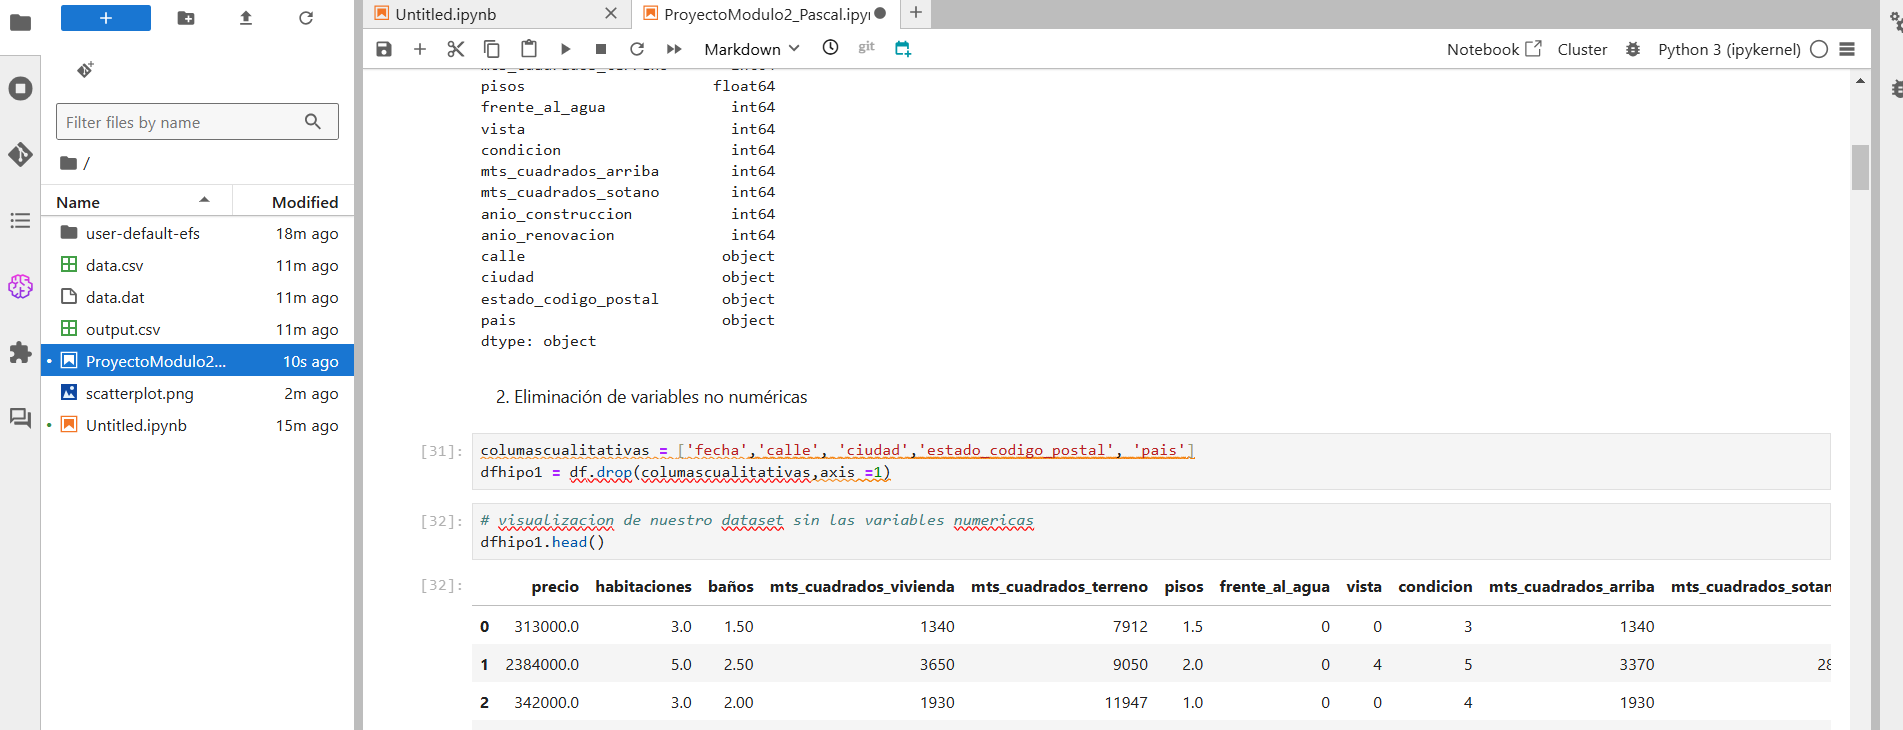